In [1]:
from GPUCBAgent_Continuous import GPUCBAgent
from StochasticPricingEnvironment import StochasticPricingEnvironment
import numpy as np 
import matplotlib.pyplot as plt
import scipy

In [2]:
min_price, max_price = 0, 1
n_customers = 100
cost = 0.1

T = 200

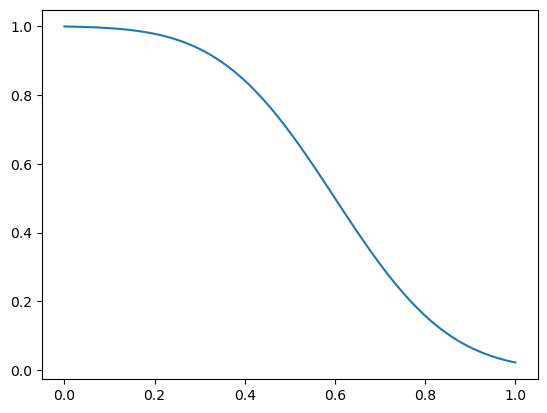

In [3]:
# conversion prob
conversion_probability = lambda p: scipy.stats.norm.cdf(5*(1-p)-2,0,1)

plt.plot(np.linspace(0,1,100), conversion_probability(np.linspace(0,1,100)))

In [4]:
# reward function
def reward_function(price, n_sales):
    return (price-cost)*n_sales
maximum_profit = reward_function(max_price, n_customers)

# profit curve
def profit_curve(price):
    return 1/reward_function(price, n_customers*conversion_probability(price))

In [5]:
expected_clairvoyant_rewards = []

best_price = scipy.optimize.minimize(profit_curve, x0 = 0.5, bounds = [(0, 1)])
print(f'Optimization procedure ended with success: {best_price.success}.\nBest price = {best_price.x[0]}.')
expected_clairvoyant_rewards = np.repeat(profit_curve(best_price.x[0]), T)

Optimization procedure ended with success: True.
Best price = 0.4976012174218717.


In [6]:
# initialize agennt and environment
gp_agent = GPUCBAgent(T)
env = StochasticPricingEnvironment(conversion_probability=conversion_probability, cost=cost)
gp_agent_rewards = np.array([])
for t in range(T):
    p_t = gp_agent.pull_arm()
    d_t, r_t = env.round(p_t, n_t=n_customers)
    gp_agent.update(r_t/n_customers)
    gp_agent_rewards = np.append(gp_agent_rewards, r_t)
    print(f"day: {t}")
    print(f"price: {p_t}")
    print(f"revenue: {r_t}")
    print("----------------------------")

day: 0
price: 0.5
revenue: 29.200000000000003
----------------------------
day: 1
price: 0.5
revenue: 23.6
----------------------------
day: 2
price: 0.5
revenue: 28.0
----------------------------
day: 3
price: 1.0
revenue: 0.9
----------------------------
day: 4
price: 0.0
revenue: -9.9
----------------------------
day: 5
price: 0.6456964062767366
revenue: 21.28215984479273
----------------------------
day: 6
price: 0.058653725841758195
revenue: -4.134627415824181
----------------------------
day: 7
price: 0.4873843339117746
revenue: 26.342134706000675
----------------------------
day: 8
price: 0.49455884556869456
revenue: 29.591913417652094
----------------------------
day: 9
price: 0.48897387488070115
revenue: 28.395092866291183
----------------------------
day: 10
price: 0.48778552543569376
revenue: 27.144986780498563
----------------------------
day: 11
price: 0.4901597202329484
revenue: 24.58006237467575
----------------------------
day: 12
price: 0.49733292762462256
revenue: 27.

day: 93
price: 0.5001040913864735
revenue: 27.607182305666672
----------------------------
day: 94
price: 0.5001168137260189
revenue: 28.408293774547342
----------------------------
day: 95
price: 0.5000903293389888
revenue: 27.206142395051238
----------------------------
day: 96
price: 0.5001715486447852
revenue: 27.61183685649018
----------------------------
day: 97
price: 0.5001259181148873
revenue: 29.209192022386773
----------------------------
day: 98
price: 0.5000004419119025
revenue: 29.200032259568886
----------------------------
day: 99
price: 0.49984639810396625
revenue: 27.98924786727764
----------------------------
day: 100
price: 0.49984995088933515
revenue: 26.39009675869612
----------------------------
day: 101
price: 0.5000180874951587
revenue: 26.801211862175638
----------------------------
day: 102
price: 0.5000869134695253
revenue: 27.605997029397244
----------------------------
day: 103
price: 0.5001393750154222
revenue: 25.2087806259716
---------------------------

day: 186
price: 0.5003661979931796
revenue: 26.023802869556675
----------------------------
day: 187
price: 0.5004338113346545
revenue: 28.831234416095125
----------------------------
day: 188
price: 0.5004117780299041
revenue: 28.829648018153097
----------------------------
day: 189
price: 0.5003795985186809
revenue: 25.223914706676894
----------------------------
day: 190
price: 0.5004769204459635
revenue: 29.234815192555335
----------------------------
day: 191
price: 0.5004827609521877
revenue: 28.43427602760533
----------------------------
day: 192
price: 0.5003454084487847
revenue: 26.422796957619795
----------------------------
day: 193
price: 0.5004923432724844
revenue: 25.231017626166516
----------------------------
day: 194
price: 0.5004254609040475
revenue: 26.027654958763087
----------------------------
day: 195
price: 0.5005991998860165
revenue: 30.445539191337257
----------------------------
day: 196
price: 0.5006713642712153
revenue: 28.848338227527503
------------------